In [11]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [12]:
# load in the datasets
wordData1 = pd.read_csv("google-books-common-words.csv")
wordData2 = pd.read_csv("kaggle_freq.csv")
wordData3 = pd.read_csv("wordFrequency.csv")

# use dataset created in other file - already sorted
combinedData = pd.read_csv("combinedWordFrequencies.csv")

# words in 1st dataset are all caps - change to lower case
wordData1["word"] = wordData1["word"].str.lower()

     word     frequency
0     the  7.628329e+10
1      in  7.609784e+10
2      of  4.414118e+10
3     and  3.565444e+10
4    that  3.421583e+10
5      to  3.151038e+10
6     for  2.496544e+10
7       a  2.441549e+10
8      as  2.384972e+10
9      it  1.711760e+10
10     on  1.669679e+10
11     by  1.610976e+10
12    not  1.431712e+10
13   this  1.411462e+10
14     is  1.308999e+10
15     no  1.169103e+10
16    one  9.430443e+09
17    his  8.546873e+09
18   with  8.372351e+09
19    all  8.173573e+09
20    but  7.589076e+09
21   like  7.385084e+09
22     be  7.249984e+09
23  other  7.086716e+09
24    was  6.986143e+09 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337799 entries, 0 to 337798
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   word       337798 non-null  object 
 1   frequency  337799 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.2+ MB
None 

Axes(0.125,0.125;0.775x0.755) 



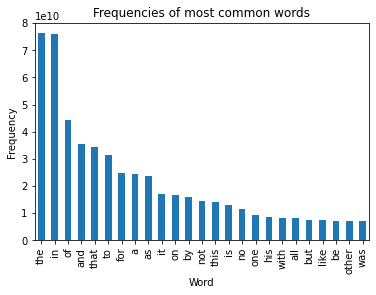

In [13]:
# ** EXPERIMENT 1 **

# display frequency table and bar graph of 25 most common words and their frequencies
print(combinedData.head(25), "\n")
print(combinedData.info(), "\n")
freqPlot = combinedData.head(25).plot.bar(x='word', y='frequency', rot=90, title='Frequencies of most common words', legend=False)
freqPlot.set(xlabel="Word", ylabel="Frequency")
print(freqPlot, "\n")

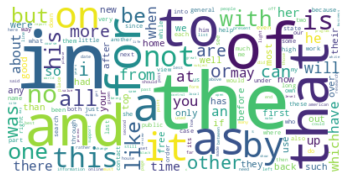

In [14]:
# use wordcloud package to create a wordcloud of words and their frequencies
wordFrequencies = dict(zip(combinedData['word'], combinedData['frequency']))
cloud = WordCloud(background_color='white').generate_from_frequencies(wordFrequencies)

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# create a column for relative frequency and create new histogram of relative frequency
# relative freq = frequency / total frequency
combinedData['relativeFrequency'] = combinedData['frequency'] / combinedData['frequency'].sum() 

# display top 5 relative frequencies
print("Relative frequencies of top 5 words from trimmed dataset:\n", combinedData['relativeFrequency'].head(), "\n")

Relative frequencies of top 5 words from trimmed dataset:
 0    0.045121
1    0.045011
2    0.026109
3    0.021089
4    0.020238
Name: relativeFrequency, dtype: float64 



Mean word length for the first dataset: 7.596332626098008
Mean word length for the second dataset: 7.470358292508047
Mean word length for the third dataset: 6.410180233709646 

Mean length of top 25 words in the first dataset: 2.52
Mean length of top 25 words in the first dataset: 2.6
Mean length of top 25 words in the first dataset: 2.72


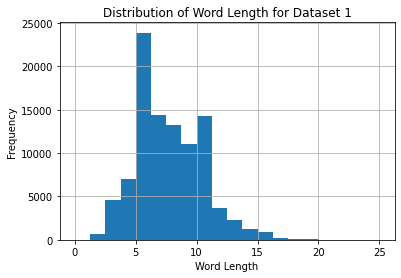

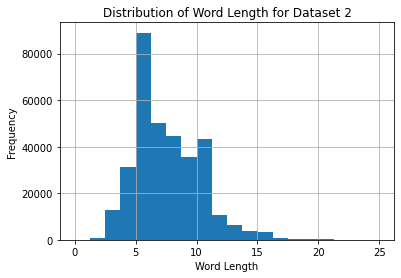

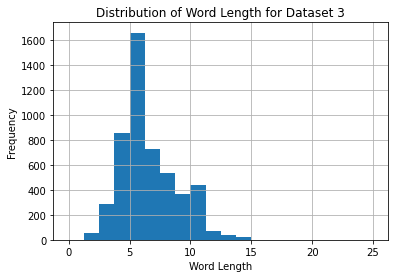

In [16]:
# ** EXPERIMENT 2 **

# add column for length to each individual dataset (and combined to use for later)
wordData1['length'] = wordData1['word'].str.len()
wordData2['length'] = wordData2['word'].str.len()
wordData3['length'] = wordData3['word'].str.len()
combinedData['length'] = combinedData['word'].str.len()

# sorted = wordData1.sort_values('length', ascending=False)
# print(sorted.head(10))
# print(wordData1['length'].mode())

# create and print histograms for length of words for each dataset

# originally just used these print statements, switched to code below so I could add labels
# print(wordData1.hist(column="length", bins=20, range=[0,25]), "\n")
# print(wordData2.hist(column="length",bins=20, range=[0,25]), "\n")
# print(wordData3.hist(column="length",bins=15, range=[0,25]), "\n")
wordData1.hist(column="length", bins=20, range=[0,25])
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Distribution of Word Length for Dataset 1")
plt.show

wordData2.hist(column="length",bins=20, range=[0,25])
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Distribution of Word Length for Dataset 2")
plt.show

wordData3.hist(column="length",bins=20, range=[0,25])
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Distribution of Word Length for Dataset 3")
plt.show

# calculate and print the average word length of each dataset
print("Mean word length for the first dataset:", wordData1['length'].mean())
print("Mean word length for the second dataset:", wordData2['length'].mean())
print("Mean word length for the third dataset:", wordData3['length'].mean(), "\n")

# sort each dataset by frequency and get average length of top 25 entries of each
sorted1 = wordData1.sort_values('frequency', ascending=False)
sorted2 = wordData2.sort_values('frequency', ascending=False)
sorted3 = wordData3.sort_values('frequency', ascending=False)

print("Mean length of top 25 words in the first dataset:", sorted1['length'].head(25).mean())
print("Mean length of top 25 words in the first dataset:", sorted2['length'].head(25).mean())
print("Mean length of top 25 words in the first dataset:", sorted3['length'].head(25).mean())

Trimming the dataset based on length gets rid of 85227 entries

        word     frequency  relativeFrequency  length
63    before  2.648960e+09           0.001567     6.0
73   general  2.287348e+09           0.001353     7.0
77    search  2.168089e+09           0.001282     6.0
82    public  2.076510e+09           0.001228     6.0
89   through  1.979769e+09           0.001171     7.0
92    little  1.890739e+09           0.001118     6.0
99   because  1.768638e+09           0.001046     7.0
117  contact  1.437543e+09           0.000850     7.0
125  another  1.275058e+09           0.000754     7.0
128  present  1.239739e+09           0.000733     7.0 

Axes(0.125,0.125;0.775x0.755) 

Relative frequencies of top 5 words from trimmed dataset:
 63    0.005111
73    0.004414
77    0.004183
82    0.004007
89    0.003820
Name: relativeFrequency, dtype: float64 



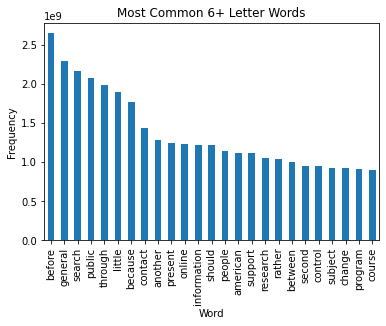

In [17]:
# ** EXPERIMENT 3 **

# eliminate any words less than 6 letters long from the dataset and save to new trimmed dataframe
totalEntries = combinedData['word'].count()
trimmedLengthSet = combinedData.drop(combinedData[combinedData['length'] < 6].index)
# use count method to find how many entries were discarded
difference = totalEntries - trimmedLengthSet['word'].count()
print("Trimming the dataset based on length gets rid of", difference, "entries\n")
print(trimmedLengthSet.head(10), "\n")

# sort trimmed dataset based on descending frequency
sortedTrimmed = trimmedLengthSet.sort_values('frequency', ascending=False)

# plot a bar graph of the frequencies of the new top 25 words
trimFreqPlot = sortedTrimmed.head(25).plot.bar(x='word', y='frequency', rot=90, title="Most Common 6+ Letter Words", legend=False)
trimFreqPlot.set(xlabel='Word', ylabel='Frequency')
print(trimFreqPlot, "\n")

# create a column for relative frequency and create new histogram of relative frequency
# relative freq = frequency / total frequency
sortedTrimmed['relativeFrequency'] = sortedTrimmed['frequency'] / sortedTrimmed['frequency'].sum() 

# display top 5 relative frequencies
print("Relative frequencies of top 5 words from trimmed dataset:\n", sortedTrimmed['relativeFrequency'].head(), "\n")